## Step 1: Load and Explore the Dataset
I'll start by loading the dataset and displaying some basic information about it.

In [845]:
import pandas as pd

df = pd.read_csv("synthetic_health_data.csv")
df.head()

,UserID,Age,Gender,Height,Weight,BMI,Health Goals,Activity Level,ProteinA,ProteinB,...,Diet Type,Sleep Quality,Stress Level,Blood Pressure,Heart Rate,Blood Sugar,Recommended Diet,Exercise Plan,Stress Management,Supplement Recommendations
0,1,56,Male,161,99,38.192971,Stress Reduction,Lightly Active,4.582792,2.357291,...,Keto,5,7,120/85,90,79,Low Carb,Cardio,Therapy,"Omega-3, Vitamin B12"
1,2,46,Female,152,84,36.357341,Weight Loss,Very Active,4.134000,3.835596,...,Vegetarian,3,4,135/87,90,99,Balanced,Strength Training,Yoga,"Vitamin B12, Omega-3"
2,3,32,Male,194,50,13.285153,Weight Loss,Moderately Active,3.798821,4.975136,...,Gluten Free,5,2,124/78,95,102,Low Carb,Strength Training,Yoga,"Omega-3, Vitamin B12"
3,4,60,Other,167,73,26.175195,Weight Loss,Sedentary,3.467776,2.258516,...,No restrictions,8,9,121/87,69,88,Balanced,Strength Training,Meditation,"Vitamin D, Omega-3"
4,5,25,Male,189,85,23.795526,Stress Reduction,Very Active,4.453863,3.696070,...,Gluten Free,8,9,114/77,85,94,Balanced,Strength Training,Yoga,"Omega-3, Vitamin D"


In [846]:
df.describe()

,UserID,Age,Height,Weight,BMI,ProteinA,ProteinB,LipidA,LipidB,MicrobeA,MicrobeB,Symptom Severity,Sleep Quality,Stress Level,Heart Rate,Blood Sugar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,174.279000,74.775000,25.108534,2.931165,2.964115,2.991194,3.046285,50.323082,49.676918,5.123000,4.971000,4.908000,79.061000,89.940000
std,288.819436,13.497852,14.517986,14.325907,6.329327,1.170745,1.145334,1.150282,1.159511,23.475096,23.475096,2.581576,2.579305,2.626106,11.511377,11.633303
min,1.000000,18.000000,150.000000,50.000000,12.878463,1.000746,1.008306,1.002510,1.011647,10.108442,10.020698,1.000000,1.000000,1.000000,60.000000,70.000000
25%,250.750000,29.000000,162.000000,63.000000,20.444096,1.920530,1.969890,2.026363,2.089098,30.722931,29.061048,3.000000,3.000000,2.000000,69.000000,80.000000
50%,500.500000,42.000000,174.000000,75.000000,24.512271,2.881731,2.953320,3.018533,3.073525,49.556474,50.443526,5.000000,5.000000,5.000000,79.000000,90.000000
75%,750.250000,52.000000,187.000000,87.000000,29.066638,3.979390,3.953248,3.921401,4.061464,70.938952,69.277069,7.000000,7.000000,7.000000,89.000000,101.000000
max,1000.000000,64.000000,199.000000,99.000000,44.000000,4.990491,4.996198,4.999397,4.992936,89.979302,89.891558,9.000000,9.000000,9.000000,99.000000,109.000000


Looking for missing values on the dataset

In [847]:
df.isnull().sum()

UserID                        0
Age                           0
Gender                        0
Height                        0
Weight                        0
BMI                           0
Health Goals                  0
Activity Level                0
ProteinA                      0
ProteinB                      0
LipidA                        0
LipidB                        0
MicrobeA                      0
MicrobeB                      0
Current Symptoms              0
Symptom Severity              0
Symptom Frequency             0
Diet Type                     0
Sleep Quality                 0
Stress Level                  0
Blood Pressure                0
Heart Rate                    0
Blood Sugar                   0
Recommended Diet              0
Exercise Plan                 0
Stress Management             0
Supplement Recommendations    0
dtype: int64

Looking to see colums class so they can be label or not

In [848]:
df.dtypes

UserID                          int64
Age                             int64
Gender                         object
Height                          int64
Weight                          int64
BMI                           float64
Health Goals                   object
Activity Level                 object
ProteinA                      float64
ProteinB                      float64
LipidA                        float64
LipidB                        float64
MicrobeA                      float64
MicrobeB                      float64
Current Symptoms               object
Symptom Severity                int64
Symptom Frequency              object
Diet Type                      object
Sleep Quality                   int64
Stress Level                    int64
Blood Pressure                 object
Heart Rate                      int64
Blood Sugar                     int64
Recommended Diet               object
Exercise Plan                  object
Stress Management              object
Supplement R

In [849]:
df.shape

(1000, 27)

# Step 2: Data Preprocessing


Now lets label colums so the model can interpretate better the data


In [850]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded = df.copy()  # Make a copy of the original dataframe

## Explanation of Key Health Metrics for proper labeling:

### Blood Pressure:
Blood pressure is the force exerted by circulating blood against the walls of the body's arteries, the major blood vessels in the body. It is typically recorded as two numbers, the systolic pressure (higher number) over the diastolic pressure (lower number). For example, a reading of 120/80 mmHg.

- **Systolic Pressure**: The pressure in the arteries when the heart beats.
- **Diastolic Pressure**: The pressure in the arteries when the heart rests between beats.

### BMI (Body Mass Index):
BMI is a value derived from the weight and height of an individual. The BMI is defined as the body mass divided by the square of the body height, expressed in units of kg/m², resulting from mass in kilograms and height in meters.

### Heart Rate:
Heart rate is the number of heartbeats per unit of time, typically expressed as beats per minute (bpm). A normal resting heart rate for adults ranges from 60 to 100 bpm.

### Blood Sugar:
Blood sugar level, or blood glucose level, is the concentration of glucose present in the blood. Normal blood sugar levels for adults, without diabetes, are less than 100 mg/dL after not eating (fasting) for at least 8 hours and less than 140 mg/dL two hours after eating.

### Components of Blood:

- **ProteinA**: This represents the concentration of a specific protein in the user's body. Proteins are essential macromolecules that play critical roles in various biological processes, including enzyme catalysis, DNA replication, transport of molecules, and cellular structure. The level of ProteinA might be obtained through blood tests or other diagnostic procedures. Variations in ProteinA levels can indicate various health conditions, such as liver disease, kidney dysfunction, or nutritional status.

- **ProteinB**: Similar to ProteinA, ProteinB represents the concentration of another specific protein in the user's body. Different proteins have unique functions and can serve as biomarkers for different health conditions. For instance, elevated levels of certain proteins can indicate inflammation or infection, while others might be linked to chronic diseases or metabolic disorders.

- **LipidA**: This denotes the level of a specific lipid in the user's body. Lipids are a diverse group of hydrophobic molecules, including fats, oils, and cholesterol. They are crucial for storing energy, forming cell membranes, and serving as signaling molecules. The level of LipidA can provide insights into the user's metabolic health, risk of cardiovascular disease, and overall lipid metabolism.

- **LipidB**: This represents the concentration of another specific lipid in the user's body. Different lipids have distinct roles and can be indicative of various health conditions. For example, elevated levels of certain lipids may signal an increased risk of atherosclerosis, while others might reflect abnormalities in lipid metabolism or endocrine function.

- **MicrobeA**: This measures the level or presence of a specific microbe in the user's body, such as bacteria, viruses, fungi, or archaea. The human body hosts trillions of microbes, collectively known as the microbiota, which are vital for maintaining health. MicrobeA could represent a beneficial microbe that aids in digestion, immune function, or synthesis of essential nutrients. Conversely, its presence might indicate an infection or dysbiosis (microbial imbalance).

- **MicrobeB**: Similar to MicrobeA, MicrobeB represents the level or presence of another specific microbe in the user's body. The diversity and composition of the microbiota are crucial for health, influencing processes like digestion, immune response, and even mental health. Variations in MicrobeB levels can provide insights into the user's gut health, susceptibility to infections, and overall microbiome balance.

Understanding these variables allows for a comprehensive assessment of a user's health, enabling personalized recommendations for diet, exercise, and supplements. Monitoring these biomarkers can also help detect early signs of diseases, tailor interventions, and track the effectiveness of treatments.



In [851]:
#lets cagegorize BMi  using a function to categorize the BMI taking into account the WHO classification of BMI
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
    
df_encoded['BMI'] = df_encoded['BMI'].apply(bmi_category)

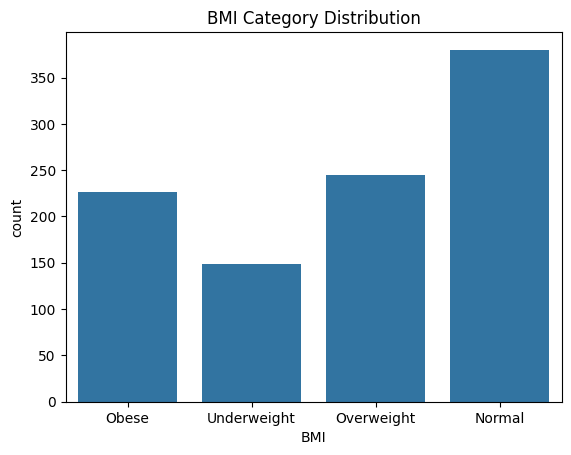

In [852]:
#plotting the BMI category distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='BMI', data=df_encoded)
plt.title('BMI Category Distribution')
plt.show()

In [853]:
def categorize_blood_pressure(value):
    """
    Categorizes blood pressure based on the given value.

    Parameters:
    value (str): The blood pressure value in the format 'systolic/diastolic'.

    Returns:
    str: The category of the blood pressure value. Possible categories are:
         - 'Normal': If systolic < 120 and diastolic < 80.
         - 'Elevated': If 120 <= systolic < 130 and diastolic < 80.
         - 'Stage 1 Hypertension': If 130 <= systolic < 140 or 80 <= diastolic < 90.
         - 'Stage 2 Hypertension': If systolic >= 140 or diastolic >= 90.
         - 'Unknown': If none of the above conditions are met.
    """
    systolic, diastolic = value.split('/')
    systolic = int(systolic)
    diastolic = int(diastolic)
    
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif systolic >= 120 and systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif (systolic >= 130 and systolic < 140) or (diastolic >= 80 and diastolic < 90):
        return 'Stage 1 Hypertension'
    elif systolic >= 140 or diastolic >= 90:
        return 'Stage 2 Hypertension'
    else:
        return 'Unknown'

# Apply the categorize_blood_pressure function to the "blood_pressure" column
df_encoded['Blood Pressure'] = df_encoded['Blood Pressure'].apply(categorize_blood_pressure)


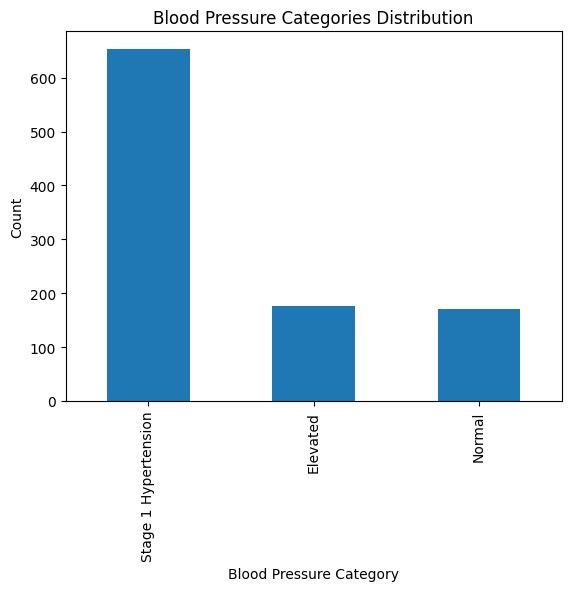

In [854]:
#plotting the blood pressure categories distribution
import matplotlib.pyplot as plt

df_encoded['Blood Pressure'].value_counts().plot(kind='bar')
plt.title('Blood Pressure Categories Distribution')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.show()

0      90
1      90
2      95
3      69
4      85
       ..
995    96
996    90
997    61
998    90
999    81
Name: Heart Rate, Length: 1000, dtype: int64


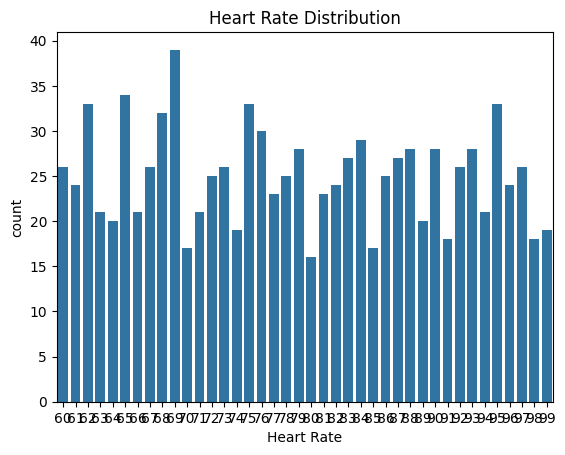

In [855]:
#print heart rate column
print(df_encoded['Heart Rate'])

#plotting the heart rate column
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Heart Rate', data=df_encoded)
plt.title('Heart Rate Distribution')
plt.show()

Since all the heart rates are around the normal BPM range they dont put as much value as expected

In [856]:
#drop the heart rate column
df_encoded.drop('Heart Rate', axis=1, inplace=True)

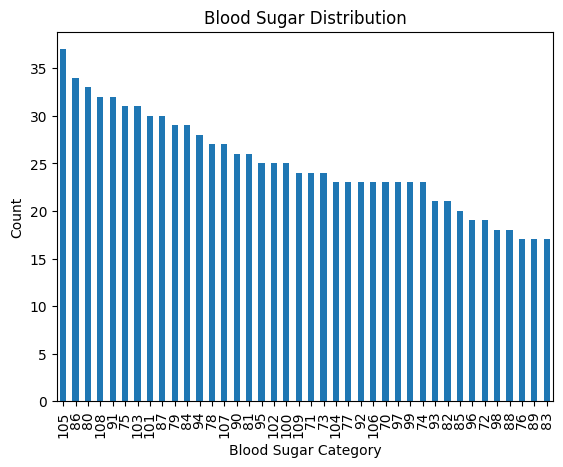

In [857]:
#plotting the blood sugar column distribution
df_encoded['Blood Sugar'].value_counts().plot(kind='bar')
plt.title('Blood Sugar Distribution')
plt.xlabel('Blood Sugar Category')
plt.ylabel('Count')
plt.show()

In [858]:
#categoriza blood sugar column based on the given value turn it into low, normal, high
def categorize_blood_sugar(value):
    """
    Categorizes blood sugar based on the given value.

    Parameters:
    value (int): The blood sugar value.

    Returns:
    str: The category of the blood sugar value. Possible categories are:
         - 'Low': If blood sugar < 70.
         - 'Normal': If 70 <= blood sugar < 100.
         - 'High': If blood sugar >= 100.
         - 'Unknown': If none of the above conditions are met.
    """
    if value < 70:
        return 'Low'
    elif value >= 70 and value < 100:
        return 'Normal'
    elif value >= 100:
        return 'High'
    else:
        return 'Unknown'

# Apply the categorize_blood_sugar function to the "blood_sugar" column
df_encoded['Blood Sugar'] = df_encoded['Blood Sugar'].apply(categorize_blood_sugar)

In [859]:
def categorize_protein(protein):
    """
    Categorizes the protein level based on the given value.

    Parameters:
    protein (float): The protein level to be categorized.

    Returns:
    str: The category of the protein level. Possible values are 'Low', 'Normal', 'High', or 'Very High'.
    """
    if protein < 3.5:
        return 'Low'
    elif 3.5 <= protein < 5.0:
        return 'Normal'
    elif 5.0 <= protein < 7.0:
        return 'High'
    else:
        return 'Very High'

df_encoded['ProteinA'] = df_encoded['ProteinA'].apply(categorize_protein)
df_encoded['ProteinB'] = df_encoded['ProteinB'].apply(categorize_protein)


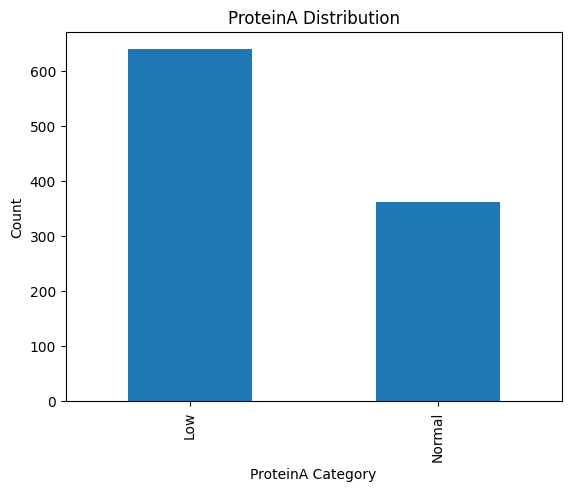

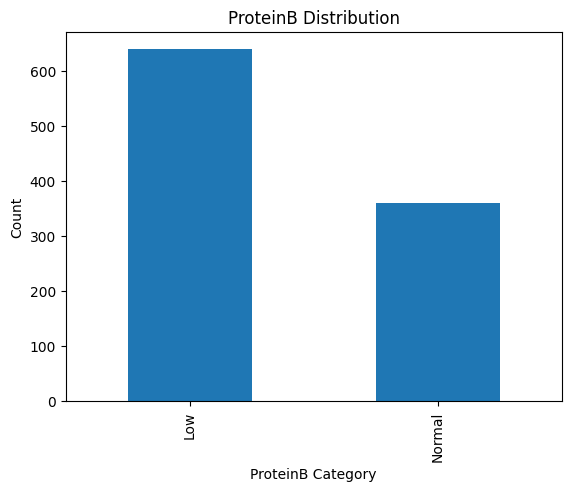

In [860]:
#plotting proteinA and proteinB columns distribution
df_encoded['ProteinA'].value_counts().plot(kind='bar')
plt.title('ProteinA Distribution')
plt.xlabel('ProteinA Category')
plt.ylabel('Count')
plt.show()

df_encoded['ProteinB'].value_counts().plot(kind='bar')
plt.title('ProteinB Distribution')
plt.xlabel('ProteinB Category')
plt.ylabel('Count')
plt.show()

In [861]:
def categorize_lipid(lipid):
    """
    Categorizes the lipid level based on the given value.

    Parameters:
    lipid (float): The lipid level to be categorized.

    Returns:
    str: The category of the lipid level. Possible values are 'Low', 'Normal', 'High', or 'Very High'.
    """
    if lipid < 1.5:
        return 'Low'
    elif 1.5 <= lipid < 3.0:
        return 'Normal'
    elif 3.0 <= lipid < 5.0:
        return 'High'
    else:
        return 'Very High'

df_encoded['LipidA'] = df_encoded['LipidA'].apply(categorize_lipid)
df_encoded['LipidB'] = df_encoded['LipidB'].apply(categorize_lipid)


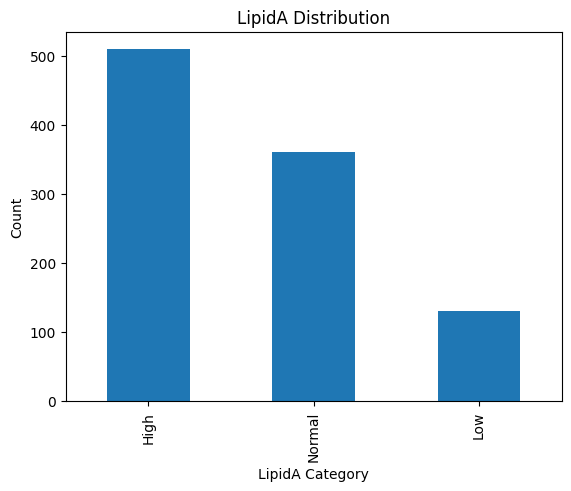

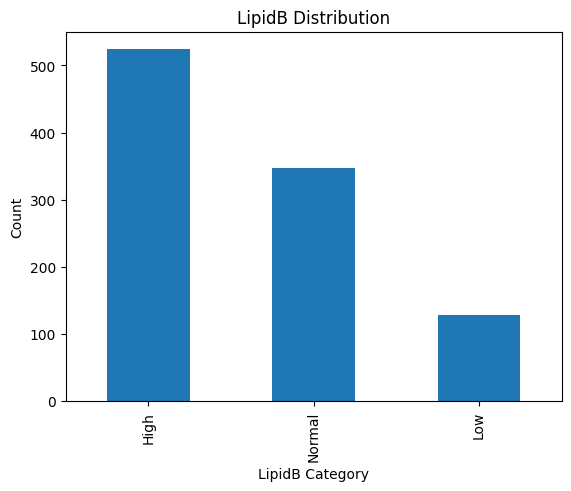

In [862]:
#plotting lipidA and lipidB columns distribution
df_encoded['LipidA'].value_counts().plot(kind='bar')
plt.title('LipidA Distribution')
plt.xlabel('LipidA Category')
plt.ylabel('Count')
plt.show()

df_encoded['LipidB'].value_counts().plot(kind='bar')
plt.title('LipidB Distribution')
plt.xlabel('LipidB Category')
plt.ylabel('Count')
plt.show()

In [863]:
def categorize_microbe(microbe):
    """
    Categorizes the given microbe level into one of four categories: 'Low', 'Normal', 'High', or 'Very High'.

    Parameters:
    microbe (int): The level of the microbe.

    Returns:
    str: The category of the microbe level.
    """
    if microbe < 20:
        return 'Low'
    elif 20 <= microbe < 50:
        return 'Normal'
    elif 50 <= microbe < 80:
        return 'High'
    else:
        return 'Very High'

df_encoded['MicrobeA'] = df_encoded['MicrobeA'].apply(categorize_microbe)
df_encoded['MicrobeB'] = df_encoded['MicrobeB'].apply(categorize_microbe)


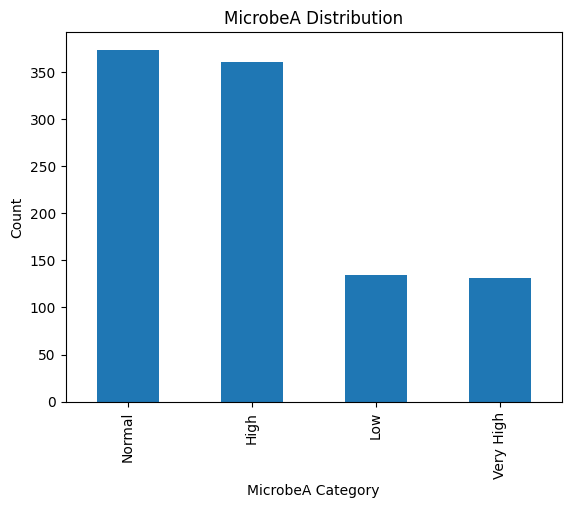

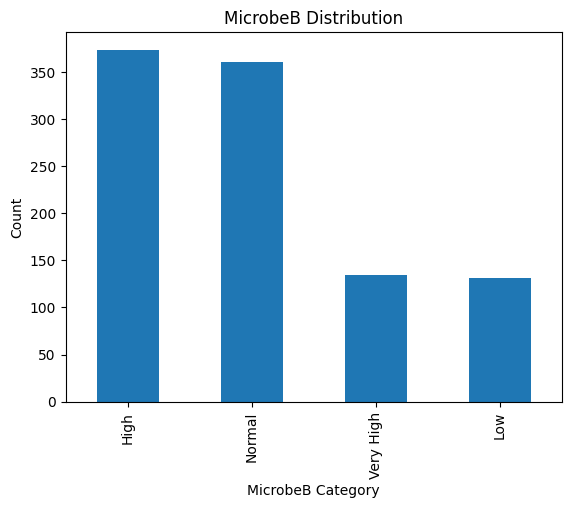

In [864]:
#plotting microbeA and microbeB columns distribution
df_encoded['MicrobeA'].value_counts().plot(kind='bar')
plt.title('MicrobeA Distribution')
plt.xlabel('MicrobeA Category')
plt.ylabel('Count')
plt.show()

df_encoded['MicrobeB'].value_counts().plot(kind='bar')
plt.title('MicrobeB Distribution')
plt.xlabel('MicrobeB Category')
plt.ylabel('Count')
plt.show()

In [865]:
# Split the Supplement Recommendations into lists
df_encoded['Supplement Recommendations'] = df_encoded['Supplement Recommendations'].str.split(',')

# Get a list of all unique supplements
all_supplements = df_encoded['Supplement Recommendations'].explode().str.strip().unique()

# Create a binary column for each supplement
for supplement in all_supplements:
    df_encoded[supplement] = df_encoded['Supplement Recommendations'].apply(lambda x: 1 if supplement in [i.strip() for i in x] else 0)

# Drop the original Supplement Recommendations column
df_encoded = df_encoded.drop(columns=['Supplement Recommendations'])



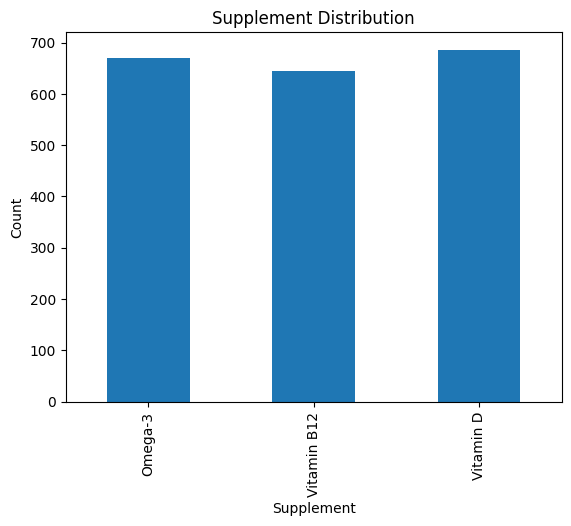

In [866]:
#plotting the supplement columns distribution using the list of all unique supplements
supplements_count = df_encoded[all_supplements].sum()


supplements_count.plot(kind='bar')
plt.title('Supplement Distribution')
plt.xlabel('Supplement')
plt.ylabel('Count')

plt.show()

In [867]:
# Create a list of symptoms
symptoms = ['Dizziness', 'Fatigue', 'Headache', 'Nausea']

# Iterate over each symptom
for symptom in symptoms:
    # Create a new column with the symptom name and assign 1 if the symptom is present, 0 otherwise
    df_encoded[symptom] = df_encoded['Current Symptoms'].apply(lambda x: 1 if symptom in x else 0)

# Drop the original Symptoms column
df_encoded = df_encoded.drop(columns=['Current Symptoms'])


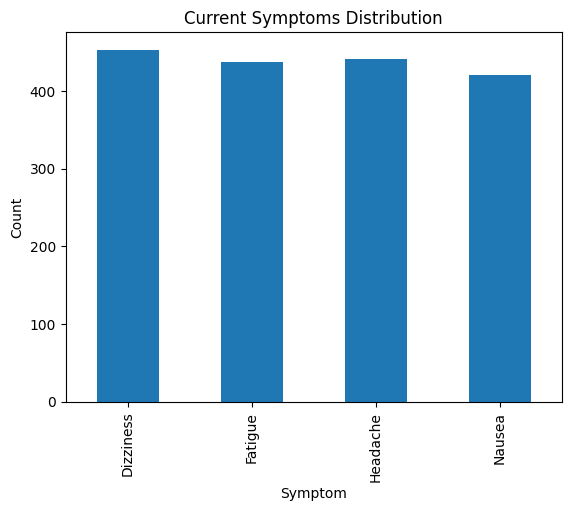

In [868]:
#plotting the current symptoms columns distribution
symptoms_count = df_encoded[symptoms].sum()

symptoms_count.plot(kind='bar')
plt.title('Current Symptoms Distribution')
plt.xlabel('Symptom')
plt.ylabel('Count')

plt.show()

In [869]:
df_encoded['BMI'] = label_encoder.fit_transform(df_encoded['BMI'])
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])
df_encoded['Health Goals'] = label_encoder.fit_transform(df_encoded['Health Goals'])
df_encoded['Activity Level'] = label_encoder.fit_transform(df_encoded['Activity Level'])
df_encoded['Recommended Diet'] = label_encoder.fit_transform(df_encoded['Recommended Diet'])
df_encoded['Exercise Plan'] = label_encoder.fit_transform(df_encoded['Exercise Plan'])
df_encoded['Stress Management'] = label_encoder.fit_transform(df_encoded['Stress Management'])
df_encoded['Diet Type'] = label_encoder.fit_transform(df_encoded['Diet Type'])
df_encoded['Symptom Frequency'] = label_encoder.fit_transform(df_encoded['Symptom Frequency'])
df_encoded['ProteinA'] = label_encoder.fit_transform(df_encoded['ProteinA'])
df_encoded['ProteinB'] = label_encoder.fit_transform(df_encoded['ProteinB'])
df_encoded['LipidA'] = label_encoder.fit_transform(df_encoded['LipidA'])
df_encoded['LipidB'] = label_encoder.fit_transform(df_encoded['LipidB'])
df_encoded['MicrobeA'] = label_encoder.fit_transform(df_encoded['MicrobeA'])
df_encoded['MicrobeB'] = label_encoder.fit_transform(df_encoded['MicrobeB'])
df_encoded['Blood Pressure'] = label_encoder.fit_transform(df_encoded['Blood Pressure'])
df_encoded['Blood Sugar'] = label_encoder.fit_transform(df_encoded['Blood Sugar'])

In [870]:
#drop the id column
df_encoded = df_encoded.drop(columns=['UserID'])

In [871]:
df = df_encoded.copy()
df.dtypes

Age                  int64
Gender               int32
Height               int64
Weight               int64
BMI                  int32
Health Goals         int32
Activity Level       int32
ProteinA             int32
ProteinB             int32
LipidA               int32
LipidB               int32
MicrobeA             int32
MicrobeB             int32
Symptom Severity     int64
Symptom Frequency    int32
Diet Type            int32
Sleep Quality        int64
Stress Level         int64
Blood Pressure       int32
Blood Sugar          int32
Recommended Diet     int32
Exercise Plan        int32
Stress Management    int32
Omega-3              int64
Vitamin B12          int64
Vitamin D            int64
Dizziness            int64
Fatigue              int64
Headache             int64
Nausea               int64
dtype: object

In [872]:
df.head()

,Age,Gender,Height,Weight,BMI,Health Goals,Activity Level,ProteinA,ProteinB,LipidA,...,Recommended Diet,Exercise Plan,Stress Management,Omega-3,Vitamin B12,Vitamin D,Dizziness,Fatigue,Headache,Nausea
0,56,1,161,99,1,1,0,1,0,0,...,2,0,1,1,1,0,1,0,1,0
1,46,0,152,84,1,2,3,1,1,2,...,1,1,2,1,1,0,1,0,1,0
2,32,1,194,50,3,2,1,1,1,1,...,2,1,2,1,1,0,1,0,0,0
3,60,2,167,73,2,2,2,0,0,0,...,1,1,0,1,0,1,1,0,0,0
4,25,1,189,85,0,1,3,1,1,0,...,1,1,2,1,0,1,1,0,1,0


## Dataset Column Descriptions

- **Age**: The age of the user in years.
- **Gender**: The gender of the user (e.g., male, female, non-binary).
- **Height**: The height of the user, typically in centimeters or inches.
- **Weight**: The weight of the user, typically in kilograms or pounds.
- **BMI**: Body Mass Index, a measure of body fat based on height and weight (kg/m²).
- **Health Goals**: The user's health goals (e.g., weight loss, muscle gain, improved stamina).
- **Activity Level**: The user's level of physical activity (e.g., sedentary, lightly active, moderately active, very active).
- **ProteinA**: The level of a specific protein in the user's body (could be a result from a blood test).
- **ProteinB**: The level of another specific protein in the user's body.
- **LipidA**: The level of a specific lipid (fat) in the user's body.
- **LipidB**: The level of another specific lipid in the user's body.
- **MicrobeA**: The level or presence of a specific microbe in the user's body (e.g., gut microbiota).
- **MicrobeB**: The level or presence of another specific microbe in the user's body.
- **Current Symptoms**: Current symptoms reported by the user (e.g., headache, nausea).
- **Symptom Severity**: The severity of the current symptoms (e.g., mild, moderate, severe).
- **Symptom Frequency**: How often the symptoms occur (e.g., daily, weekly, occasionally).
- **Diet Type**: The type of diet the user follows (e.g., vegetarian, vegan, ketogenic).
- **Sleep Quality**: The quality of the user's sleep (e.g., poor, average, good).
- **Stress Level**: The level of stress experienced by the user (e.g., low, moderate, high).
- **Blood Pressure**: A measure of the pressure of blood against the walls of the arteries, typically given as systolic/diastolic (e.g., 120/80 mmHg).
- **Blood Sugar**: The level of glucose in the user's blood.
- **Recommended Diet**: Diet recommendations personalized for the user.
- **Exercise Plan**: Exercise recommendations personalized for the user.
- **Stress Management**: Stress management techniques or recommendations personalized for the user.
- **Supplement Recommendations**: Recommendations for dietary supplements for the user.

### Additional Columns from Supplement Recommendations:
- **Dizziness**: Whether the user is recommended a supplement to manage dizziness (0 or 1).
- **Fatigue**: Whether the user is recommended a supplement to manage fatigue (0 or 1).
- **Headache**: Whether the user is recommended a supplement to manage headaches (0 or 1).
- **Nausea**: Whether the user is recommended a supplement to manage nausea (0 or 1).
- **Omega-3**: Whether the user is recommended Omega-3 supplements (0 or 1).
- **Vitamin B12**: Whether the user is recommended Vitamin B12 supplements (0 or 1).
- **Vitamin D**: Whether the user is recommended Vitamin D supplements (0 or 1).


In [873]:
df.shape

(1000, 30)

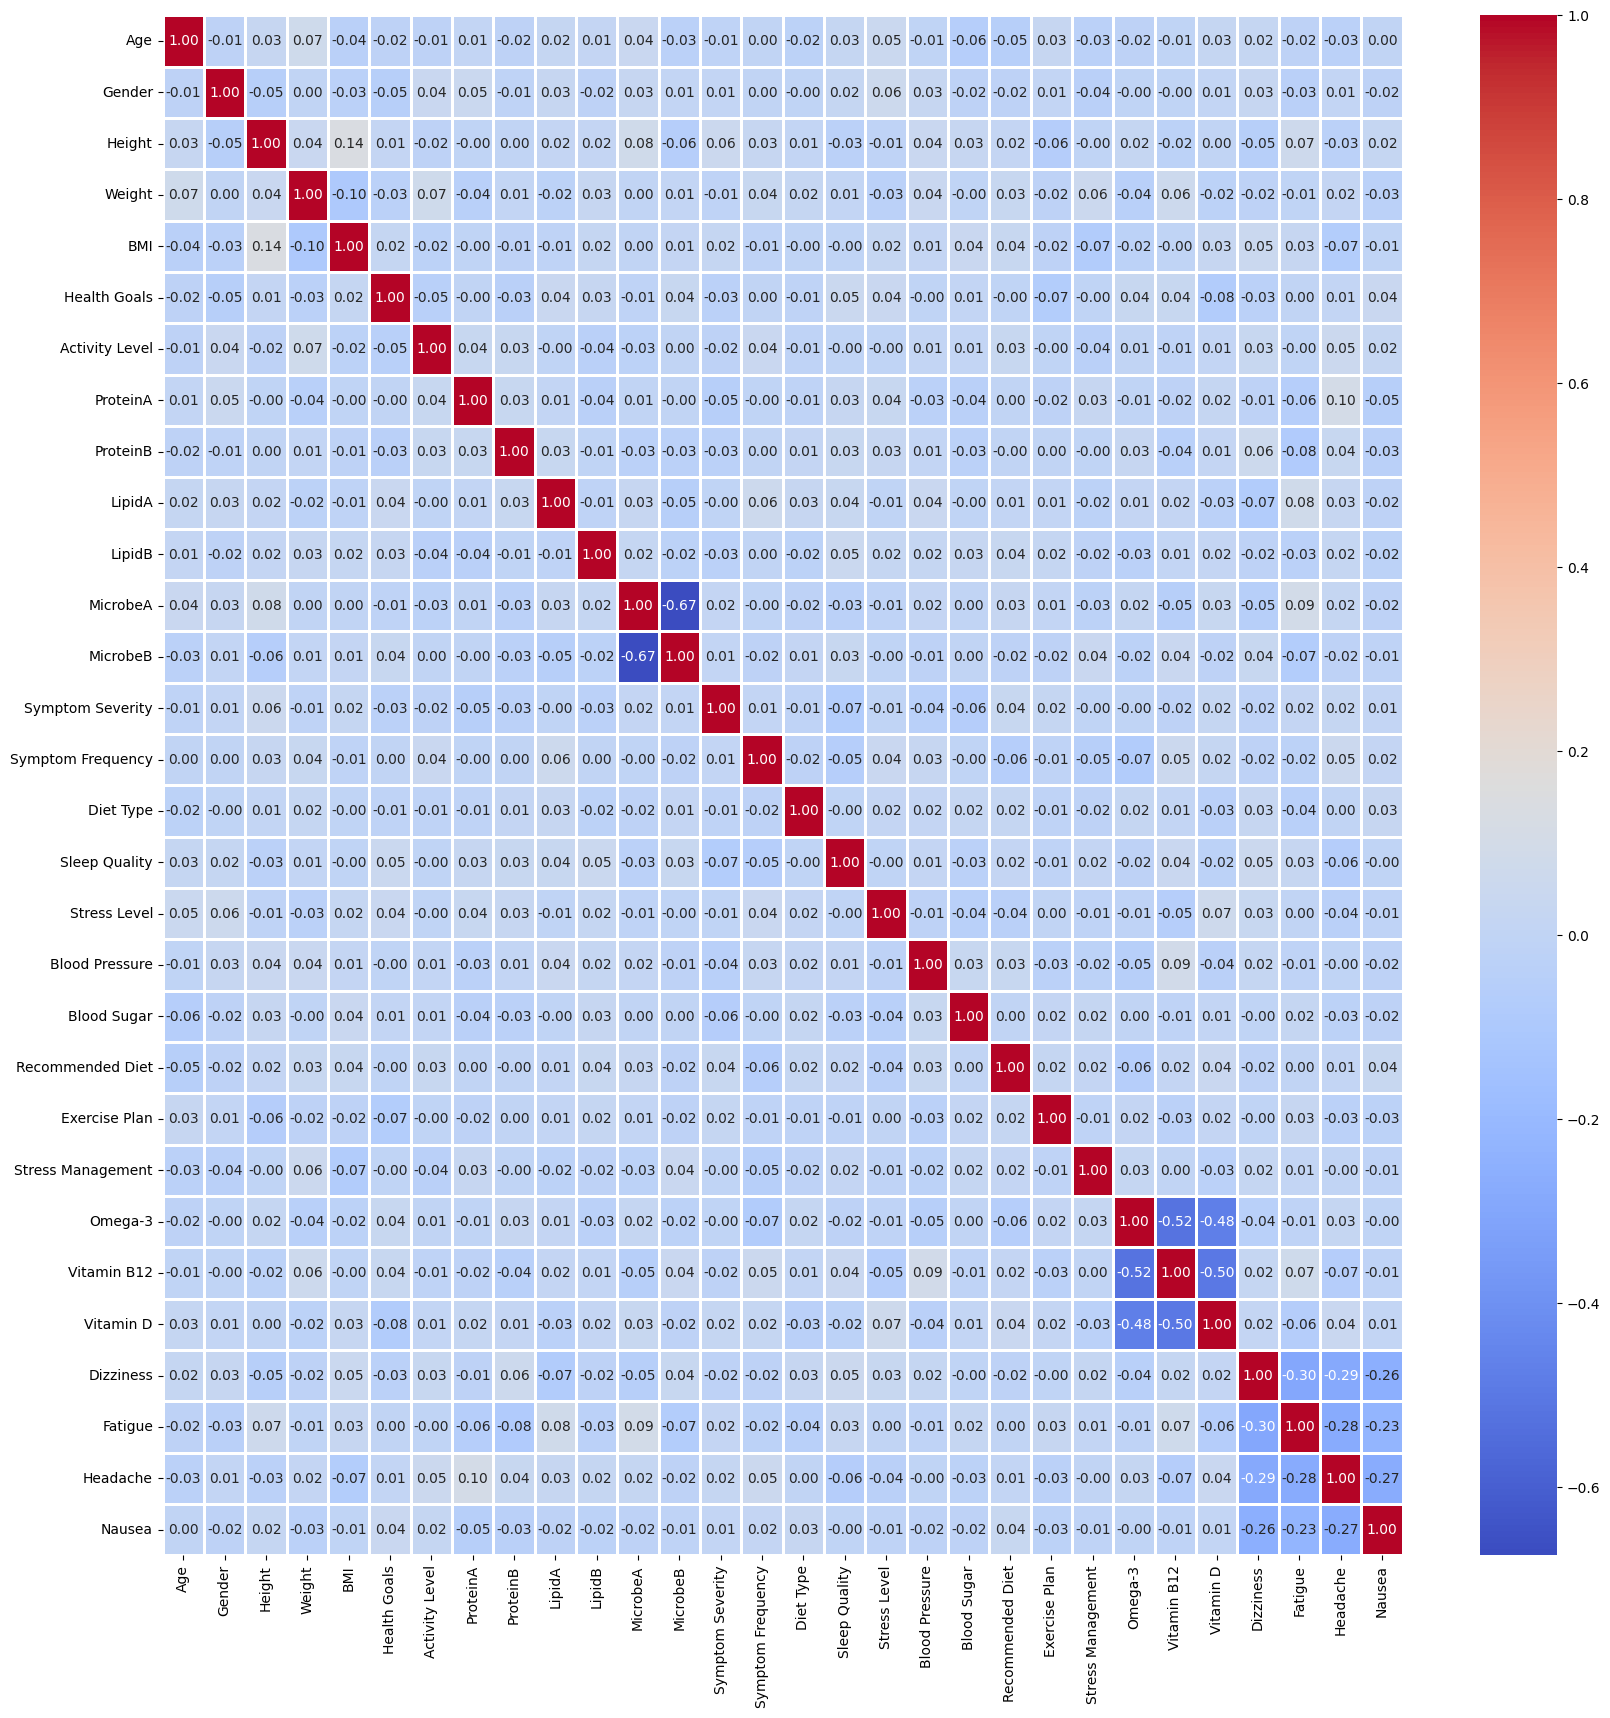

In [874]:
#show a visual representation of the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [875]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical features to normalize
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['float32']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the normalized dataframe
print(df.head())


        Age  Gender    Height    Weight  BMI  Health Goals  Activity Level  \
0  0.826087       1  0.224490  1.000000    1             1               0   
1  0.608696       0  0.040816  0.693878    1             2               3   
2  0.304348       1  0.897959  0.000000    3             2               1   
3  0.913043       2  0.346939  0.469388    2             2               2   
4  0.152174       1  0.795918  0.714286    0             1               3   

   ProteinA  ProteinB  LipidA  ...  Recommended Diet  Exercise Plan  \
0         1         0       0  ...                 2              0   
1         1         1       2  ...                 1              1   
2         1         1       1  ...                 2              1   
3         0         0       0  ...                 1              1   
4         1         1       0  ...                 1              1   

   Stress Management  Omega-3  Vitamin B12  Vitamin D  Dizziness  Fatigue  \
0                  1      1

In [876]:
#show the normalized data
print(df)


          Age  Gender    Height    Weight  BMI  Health Goals  Activity Level  \
0    0.826087       1  0.224490  1.000000    1             1               0   
1    0.608696       0  0.040816  0.693878    1             2               3   
2    0.304348       1  0.897959  0.000000    3             2               1   
3    0.913043       2  0.346939  0.469388    2             2               2   
4    0.152174       1  0.795918  0.714286    0             1               3   
..        ...     ...       ...       ...  ...           ...             ...   
995  0.086957       0  0.102041  0.183673    0             2               2   
996  0.478261       2  0.510204  0.938776    1             0               0   
997  0.195652       2  0.061224  0.448980    1             1               2   
998  0.934783       0  0.775510  0.408163    0             0               2   
999  0.021739       0  0.775510  0.408163    0             0               2   

     ProteinA  ProteinB  LipidA  ...  R

# Step 3: Model Development



Our targets would be 'Recommended Diet', 'Exercise Plan', 'Stress Management', 'Omega-3', 'Vitamin D', 'Vitamin B12'

In [877]:
import keras
from keras import models
from keras import layers

In [878]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam
from keras.callbacks import ReduceLROnPlateau

In [879]:
# Split the data into features and target variable ('Recommended Diet', 'Exercise Plan', 'Stress Management', 'Omega-3', 'Vitamin D', 'Vitamin B12')
X = df.drop(columns=['Recommended Diet', 'Exercise Plan', 'Stress Management', 'Omega-3', 'Vitamin D', 'Vitamin B12'])
y = df[['Recommended Diet', 'Exercise Plan', 'Stress Management', 'Omega-3', 'Vitamin D', 'Vitamin B12']]


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [880]:
# Define the architecture of the Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='RMSprop', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='RMSprop'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='RMSprop'),
    layers.Dropout(0.2),
    layers.Dense(8, activation='RMSprop'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='Softmax')
])

# Compile the model with an optimizer and loss function
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['acc'])

# Train the model for 100 epochs
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

C:\Users\duvan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Could not interpret activation function identifier: RMSprop

In [ ]:
# lets do a grid search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Define the architecture of the Neural Network
def create_model(optimizer='adam', activation='relu', dropout_rate=0.2):
    model = keras.Sequential([
        layers.Dense(128, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation=activation),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation=activation),
        layers.Dropout(dropout_rate),
        layers.Dense(16, activation=activation),
        layers.Dropout(dropout_rate),
        layers.Dense(6, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['acc'])

    return model

# Create a KerasRegressor object
keras_regressor = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to search
batch_size = [16,32,64]
epochs = [30,40,50]
optimizer = ['RMSprop', 'Adam', 'SGD', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']


param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)

# Create a GridSearchCV object
grid_result = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, n_jobs=-1, cv=3)

# Grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\duvan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\duvan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: -0.007786 using {'batch_size': 64, 'epochs': 30, 'optimizer': 'Adamax'}
-0.016243 (0.005747) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'RMSprop'}
-0.021452 (0.001158) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'Adam'}
-0.024094 (0.009616) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'SGD'}
-0.023531 (0.008427) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'Adagrad'}
-0.033058 (0.007125) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'Adadelta'}
-0.023214 (0.004500) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'Adamax'}
-0.025763 (0.006652) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'Nadam'}
-0.051775 (0.016251) with: {'batch_size': 16, 'epochs': 40, 'optimizer': 'RMSprop'}
-0.033303 (0.010850) with: {'batch_size': 16, 'epochs': 40, 'optimizer': 'Adam'}
-0.034563 (0.007500) with: {'batch_size': 16, 'epochs': 40, 'optimizer': 'SGD'}
-0.039394 (0.005978) with: {'batch_size': 16, 'epochs': 40, 'optimizer': 'Adagrad'}
-0.036094 (0.0

In [ ]:
#train the model with the best parameters
model = create_model(optimizer='Adamax', activation='relu',
                        dropout_rate=0.2)
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30


C:\Users\duvan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.2685 - loss: 0.5519 - val_acc: 0.3125 - val_loss: 0.5212
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3441 - loss: 0.5043 - val_acc: 0.3000 - val_loss: 0.4936
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3173 - loss: 0.4943 - val_acc: 0.3125 - val_loss: 0.4841
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3208 - loss: 0.4910 - val_acc: 0.3063 - val_loss: 0.4787
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3759 - loss: 0.4858 - val_acc: 0.3063 - val_loss: 0.4745
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3438 - loss: 0.4702 - val_acc: 0.3063 - val_loss: 0.4717
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2859 - loss: 0.4701 - val_acc: 0.3125 - val_loss: 0.4699
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3572 - loss: 0.4684 - val_acc: 0.3375 - val_loss: 0.4679
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3645 - loss: 0.4568 - v

In [ ]:
def processPredictionIntoString(sample):
    """
    Processes the predictions into a string format for the user to read.
    """
    # Make a prediction using the model
    predictions = model.predict(sample)
    
    # Convert the predictions into a dataframe
    predictions_df = pd.DataFrame(predictions, columns=['Recommended Diet', 'Exercise Plan', 'Stress Management', 'Omega-3', 'Vitamin D', 'Vitamin B12'])
    
    # Convert the numerical values into the words they represent
    predictions_df['Recommended Diet'] = predictions_df['Recommended Diet'].apply(lambda x: 'Balanced' if x < 0.5 else 'Low Carb')
    predictions_df['Exercise Plan'] = predictions_df['Exercise Plan'].apply(lambda x: 'Cardio' if x < 0.5 else 'Strength Training')
    predictions_df['Stress Management'] = predictions_df['Stress Management'].apply(lambda x: 'Meditation' if x < 0.5 else 'Yoga')
    predictions_df['Omega-3'] = predictions_df['Omega-3'].apply(lambda x: 'Yes' if x < 0.5 else 'No')
    predictions_df['Vitamin D'] = predictions_df['Vitamin D'].apply(lambda x: 'Yes' if x < 0.5 else 'No')
    predictions_df['Vitamin B12'] = predictions_df['Vitamin B12'].apply(lambda x: 'Yes' if x < 0.5 else 'No')

    
    # Print the predictions into a readable format string for the user
    
    print("Recommended Diet: ", predictions_df['Recommended Diet'].values[0])
    print("Exercise Plan: ", predictions_df['Exercise Plan'].values[0])
    print("Stress Management: ", predictions_df['Stress Management'].values[0])
    print("Omega-3: ", predictions_df['Omega-3'].values[0])
    print("Vitamin D: ", predictions_df['Vitamin D'].values[0])
    print("Vitamin B12: ", predictions_df['Vitamin B12'].values[0])
    

sample = X_test[5:]
processPredictionIntoString(sample)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
Recommended Diet:  Low Carb
Exercise Plan:  Strength Training
Stress Management:  Yoga
Omega-3:  No
Vitamin D:  No
Vitamin B12:  No
